In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Load data
rf = pd.read_csv("/Users/arsenpankiv/Desktop/Python_practice/small_dataset.csv")

# Clean data
rf["date"] = pd.to_datetime(rf["date"])
rf["skills_list"] = rf["skills_list"].apply(
    lambda skills: ast.literal_eval(skills) if isinstance(skills, str) else skills
)

In [2]:
copied = rf.copy()
copied_exploded = copied.explode("skills_list")
copied_exploded[["job_title", "skills_list"]]

# grouped = copied_exploded.groupby(["job_title", "skills_list"]).size()
# grouped_2 =grouped.reset_index(name= "skill_count")
# grouped_2

pivot_3 = copied_exploded.pivot_table(
    index=["job_title", "skills_list"],
    aggfunc="size"
).reset_index(name= "skill_count")
# index are columns
pivot_3.sort_values(by="skill_count", ascending=False, inplace=True)
pivot_title = pivot_3["job_title"].unique().tolist()
# sorted in alphabetical order
pivot_title = sorted(pivot_title)
pivot_title


['Database Administrator', 'Operations Analyst', 'Statistician']

0 Database Administrator
                 job_title             skills_list  skill_count
11  Database Administrator                Security            3
6   Database Administrator                   NoSQL            3
3   Database Administrator           Data Recovery            3
8   Database Administrator  Performance Monitoring            2
7   Database Administrator                  Oracle            2
1 Operations Analyst
             job_title          skills_list  skill_count
18  Operations Analyst         Optimization            3
20  Operations Analyst  Process Improvement            3
21  Operations Analyst               Python            3
23  Operations Analyst                  SQL            1
22  Operations Analyst            Reporting            1
2 Statistician
       job_title  skills_list  skill_count
31  Statistician          SAS            5
30  Statistician   Regression            5
27  Statistician  Probability            5
28  Statistician       Python            

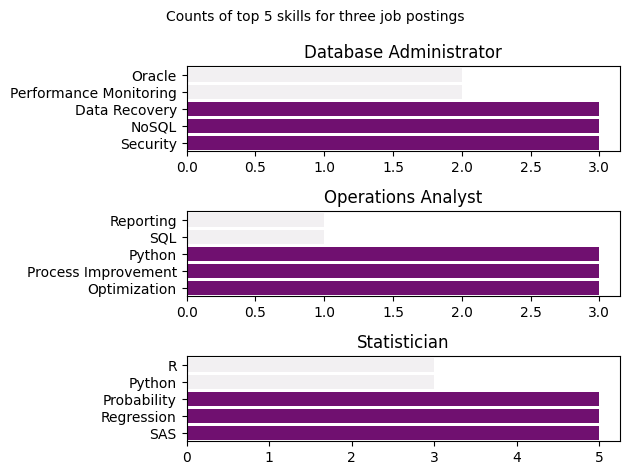

In [3]:
import seaborn as sns
fig, ax = plt.subplots(len(pivot_title),1)
# means - (3 titles) - row and 1 column

for x, title1 in enumerate(pivot_title):
    print(x,title1)
    plotted = pivot_3[pivot_3["job_title"] == title1].head(5)
    print(plotted)
    sns.barplot(data=plotted, y="skills_list",x="skill_count", hue="skill_count",ax=ax[x],palette="light:purple", legend=False)
    ax[x].set_title(title1)
    ax[x].invert_yaxis()
    ax[x].set_xlabel("")
    ax[x].set_ylabel("")
    fig.suptitle("Counts of top 5 skills for three job postings", fontsize=10)
    fig.tight_layout(h_pad=1)
    



In [13]:
"""let's now modify it and add percentages alongside with horizontal bars"""

"""copied = df_US
copied_exploded = df_skills
pivot_3 = df_skills_count"""

# look back at the dataframe named copied

# pivot_3 has 32 rows
# x = pivot_3["skill_count"].sum()
# print(x)  - 69
# copied_exploded - 72

"""copied = df_US
copied_exploded = df_skills
pivot_3 = df_skills_count"""

percentage_table = copied["job_title"].value_counts().reset_index(name="jobs_total")
# let's now merge column "jobs_total " from percentage_table with pivot_3 dataframe 
percentage_table



,job_title,jobs_total
0,Statistician,11
1,Database Administrator,8
2,Operations Analyst,7


In [14]:

pivot_3


,job_title,skills_list,skill_count
31,Statistician,SAS,5
30,Statistician,Regression,5
27,Statistician,Probability,5
28,Statistician,Python,3
29,Statistician,R,3
18,Operations Analyst,Optimization,3
24,Statistician,Data Analysis,3
11,Database Administrator,Security,3
20,Operations Analyst,Process Improvement,3
21,Operations Analyst,Python,3


In [ ]:
jobs_merged = pd.merge(pivot_3, percentage_table, how="left",on="job_title")
# how= left - everything which is in the pivot_3 dataframe we want to maintain and we want to mrge what's is available on to this dataframe
jobs_merged["skill_percent"] = 100* jobs_merged["skill_count"] / jobs_merged["jobs_total"]
jobs_merged

# Out of 11 job postings for Statistician, 5 required or mentioned SAS, → 45.45% of Statistician jobs mention SAS
# skill_count is how many times a specific skill appears for a given job_title.
# jobs_total is the total number of listings for that job title.

,job_title,skills_list,skill_count,jobs_total,skill_percent
0,Statistician,SAS,5,11,45.454545
1,Statistician,Regression,5,11,45.454545
2,Statistician,Probability,5,11,45.454545
3,Statistician,Python,3,11,27.272727
4,Statistician,R,3,11,27.272727
5,Operations Analyst,Optimization,3,7,42.857143
6,Statistician,Data Analysis,3,11,27.272727
7,Database Administrator,Security,3,8,37.500000
8,Operations Analyst,Process Improvement,3,7,42.857143
9,Operations Analyst,Python,3,7,42.857143


0 37.5
1 37.5
2 37.5
3 25.0
4 25.0
0 42.857142857142854
1 42.857142857142854
2 42.857142857142854
3 14.285714285714286
4 14.285714285714286
0 45.45454545454545
1 45.45454545454545
2 45.45454545454545
3 27.272727272727273
4 27.272727272727273


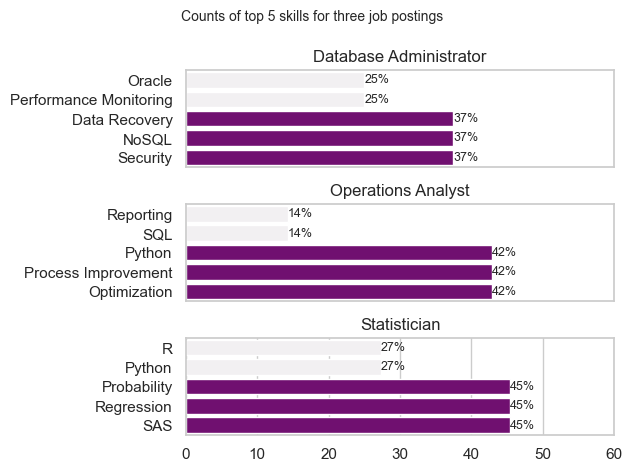

In [55]:
import seaborn as sns
fig, ax = plt.subplots(len(pivot_title),1)
# means - (3 titles) - row and 1 column


sns.set_theme(style="whitegrid")

for x, title1 in enumerate(pivot_title):
    plotted = jobs_merged[jobs_merged["job_title"] == title1].head(5)
    sns.barplot(data=plotted, y="skills_list",x="skill_percent", hue="skill_percent",ax=ax[x],palette="light:purple", legend=False)
    ax[x].set_title(title1)
    ax[x].invert_yaxis()
    ax[x].set_xlabel("")
    ax[x].set_ylabel("")
    fig.suptitle("Counts of top 5 skills for three job postings", fontsize=10)
    fig.tight_layout(h_pad=1)

   # let's visualise these percetanges along with the bars on the graph
    for index2, values2 in enumerate(plotted["skill_percent"]):
        print(index2, values2)
        ax[x].text(values2, index2, f"{int(values2)}%", fontsize=9, va="center")
# here we remove the numbers on x ax except the last barplot
    if x != len(pivot_title ) - 1:
        ax[x].set_xticks([])
    
    ax[x].set_xlim(0,60)
